### Import Libraries

In [75]:
# import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.graph_objects as go # for candlestick chart
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Load Data

In [76]:
# tickers for stocks
tickers = ['AAPL', 'NVDA', 'MSFT', 'AVGO', 'META', 'AMZN', 'TSLA']
# time period for data
start_date = '2016-01-01'
end_date = '2020-01-01'

# dict for all data dfs
data_dict = {}

for ticker in tickers:
    # download data with yfinance
    data = yf.download(ticker, start=start_date, end=end_date, multi_level_index=False)
    # column for ticker
    data['Name'] = ticker
    
    # store df in dict
    data_dict[ticker] = data


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


* Date kolonunu (datetime pysparkta yaparız)
* aylık veya haftalık seasonality araştırabiliriz
* her stock için farklı df yapabiliriz, tahmin yapacağımız her stock için farklı model düşünüyorum

In [77]:
# access stock with corresponding ticker
df_nvda = data_dict['NVDA']
df_nvda

,Adj Close,Close,High,Low,Open,Volume,Name
Date,,,,,,,
2016-01-04 00:00:00+00:00,0.789858,0.80925,0.81450,0.80100,0.80725,358076000,NVDA
2016-01-05 00:00:00+00:00,0.802547,0.82225,0.83600,0.81250,0.82450,490272000,NVDA
2016-01-06 00:00:00+00:00,0.769362,0.78825,0.81250,0.77900,0.80875,449344000,NVDA
2016-01-07 00:00:00+00:00,0.738860,0.75700,0.77375,0.74700,0.76850,645304000,NVDA
2016-01-08 00:00:00+00:00,0.723000,0.74075,0.76750,0.73925,0.76675,398472000,NVDA
...,...,...,...,...,...,...,...
2019-12-24 00:00:00+00:00,5.941004,5.96550,5.98275,5.92050,5.95500,138864000,NVDA
2019-12-26 00:00:00+00:00,5.955198,5.97975,6.00800,5.95000,5.96900,182852000,NVDA
2019-12-27 00:00:00+00:00,5.897435,5.92175,6.00850,5.89525,5.99500,254644000,NVDA


### General Info

In [78]:
df_nvda.describe()

,Adj Close,Close,High,Low,Open,Volume
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1.006000e+03
mean,3.776098,3.813818,3.870101,3.753915,3.814663,5.331346e+08
std,1.778757,1.790403,1.815980,1.765713,1.792914,3.156884e+08
min,0.615392,0.630500,0.639000,0.618750,0.619500,1.388640e+08
25%,2.442733,2.475750,2.505625,2.440000,2.471812,3.399130e+08
50%,3.984764,4.022125,4.094625,3.943625,4.022125,4.459220e+08
75%,5.210820,5.240250,5.299125,5.152187,5.255688,6.263500e+08
max,7.169095,7.234000,7.319000,7.139500,7.233000,3.692928e+09


In [79]:
df_nvda.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2016-01-04 00:00:00+00:00 to 2019-12-31 00:00:00+00:00
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  1006 non-null   float64
 1   Close      1006 non-null   float64
 2   High       1006 non-null   float64
 3   Low        1006 non-null   float64
 4   Open       1006 non-null   float64
 5   Volume     1006 non-null   int64  
 6   Name       1006 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 62.9+ KB


In [80]:
df_nvda.isna().sum()

Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
Name         0
dtype: int64

In [81]:
df_nvda.duplicated().sum()

np.int64(0)

* datalarda eksik veya duplicate yok

No missing values

### Histrocial view of Closing Price / Volume

In [82]:
# candlestick chart 
candlestick_trace = go.Candlestick(
    x=df_nvda.index,
    open=df_nvda['Open'],
    high=df_nvda['High'],
    low=df_nvda['Low'],
    close=df_nvda['Close'],
    name='Candlestick'
)
layout = go.Layout(
    title='NVDA Candlestick Chart',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price', rangemode='normal')
)
fig = go.Figure(data=[candlestick_trace], layout=layout)

fig.update_layout(xaxis_rangeslider_visible=False)

fig.show()

In [83]:
# candlestick chart with adjusted close
candlestick_trace = go.Candlestick(
    x=df_nvda.index,
    open=df_nvda['Open'],
    high=df_nvda['High'],
    low=df_nvda['Low'],
    close=df_nvda['Adj Close'],
    name='Candlestick'
)
layout = go.Layout(
    title='NVDA Candlestick Chart with Adjusted Close',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price (USD)', rangemode='normal')
)
fig = go.Figure(data=[candlestick_trace], layout=layout)

fig.update_layout(xaxis_rangeslider_visible=False)

fig.show()

#### I decided not to use data before 2016 because the stock didn't move much before then.

### Stock Attributes from 2016 to 2020

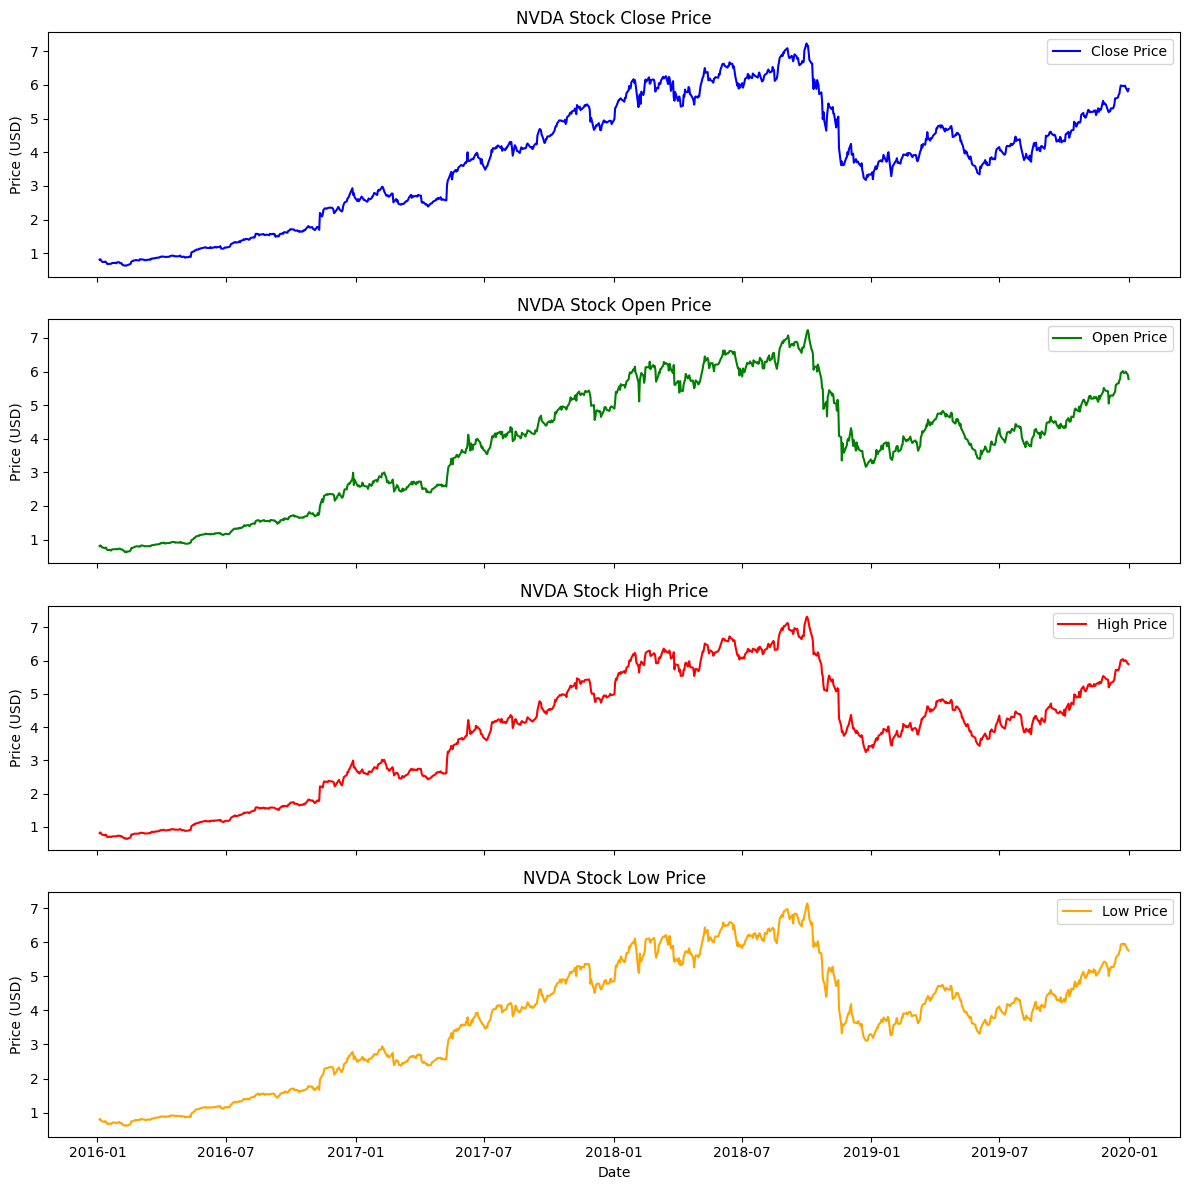

In [84]:
attributes = ['Close', 'Open', 'High', 'Low']
colors = ['blue', 'green', 'red', 'orange']  # colors for each attribute

fig, axs = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

for i, attribute in enumerate(attributes):
    axs[i].plot(df_nvda[attribute], label=f'{attribute} Price', color=colors[i])
    axs[i].set_title(f'NVDA Stock {attribute} Price')
    axs[i].set_ylabel('Price (USD)')
    axs[i].legend()

axs[3].set_xlabel('Date')

plt.tight_layout()

plt.show()


### Moving Averages

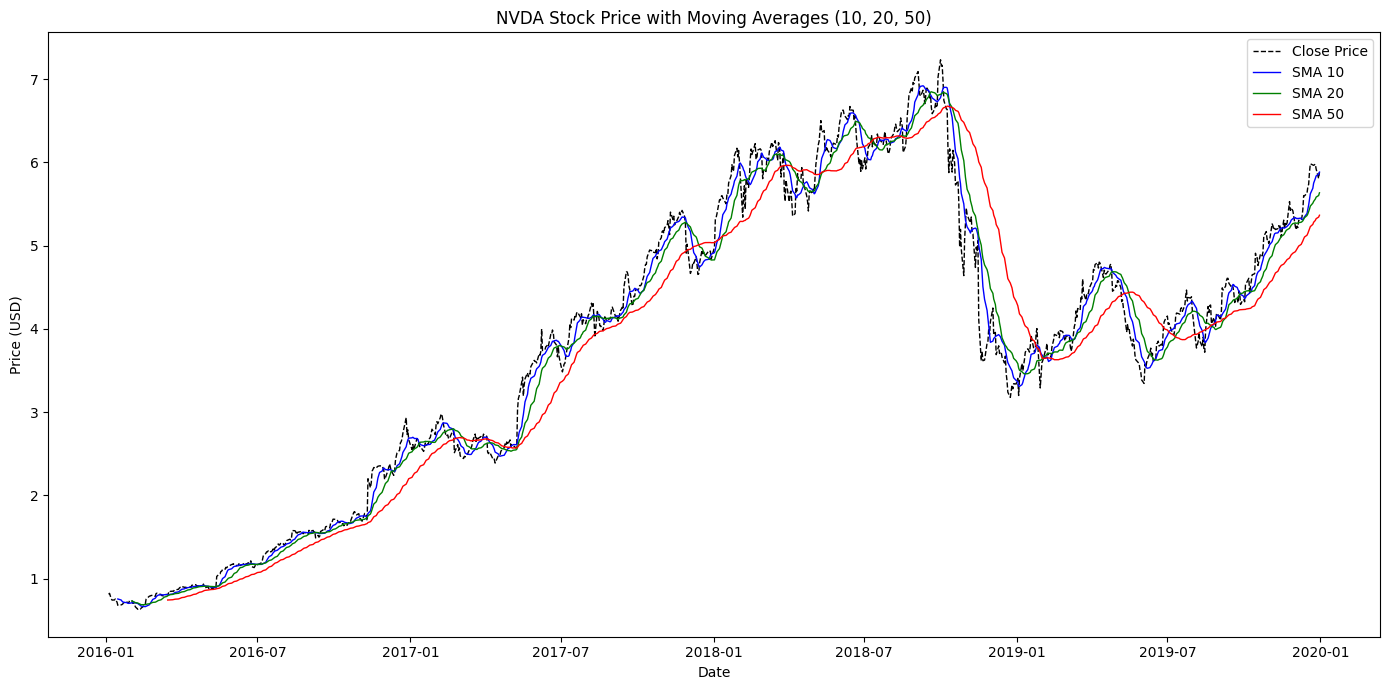

In [85]:
# calculate and plot the moving averages to check any trends

# with 10,20,50
df_nvda['SMA10'] = df_nvda['Close'].rolling(window=10).mean()
df_nvda['SMA20'] = df_nvda['Close'].rolling(window=20).mean()
df_nvda['SMA50'] = df_nvda['Close'].rolling(window=50).mean()

plt.figure(figsize=(14, 7))
plt.plot(df_nvda['Close'], label='Close Price', color='black', linestyle='--', linewidth=1)
plt.plot(df_nvda['SMA10'], label='SMA 10', color='blue', linewidth=1)
plt.plot(df_nvda['SMA20'], label='SMA 20', color='green', linewidth=1)
plt.plot(df_nvda['SMA50'], label='SMA 50', color='red', linewidth=1)

plt.title('NVDA Stock Price with Moving Averages (10, 20, 50)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

plt.tight_layout()
plt.show()

* sma 20, sma50'yi yukarı kestiğinde fiyatların yukarı gittiği, aşağı kestiğinde fiyatların düştüğü gözüküyor
* aynı ilişki sma10 ve sma20 arasında da görünüyor. Daha kısa dönem ortalamalar olduğu için bazı zamanlarda daha hassas belirtiler verebilir

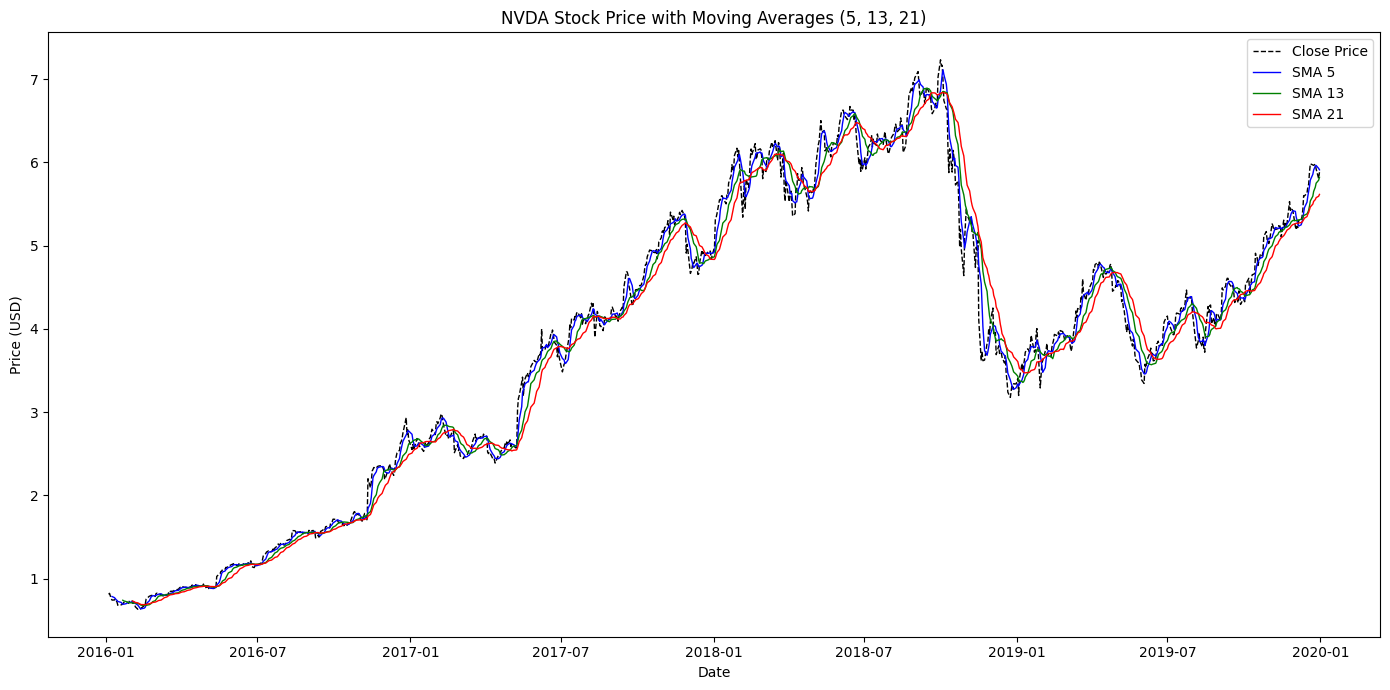

In [86]:
# calculate and plot the moving averages to check any trends

# with 5,13,21
df_nvda['SMA5'] = df_nvda['Close'].rolling(window=5).mean()
df_nvda['SMA13'] = df_nvda['Close'].rolling(window=13).mean()
df_nvda['SMA21'] = df_nvda['Close'].rolling(window=21).mean()

plt.figure(figsize=(14, 7))
plt.plot(df_nvda['Close'], label='Close Price', color='black', linestyle='--', linewidth=1)
plt.plot(df_nvda['SMA5'], label='SMA 5', color='blue', linewidth=1)
plt.plot(df_nvda['SMA13'], label='SMA 13', color='green', linewidth=1)
plt.plot(df_nvda['SMA21'], label='SMA 21', color='red', linewidth=1)


plt.title('NVDA Stock Price with Moving Averages (5, 13, 21)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

plt.tight_layout()
plt.show()

* benzer ilişkiler sma5,13,21 arasında da var.
* EMA değerlerine bakılabilir

### Daily Return

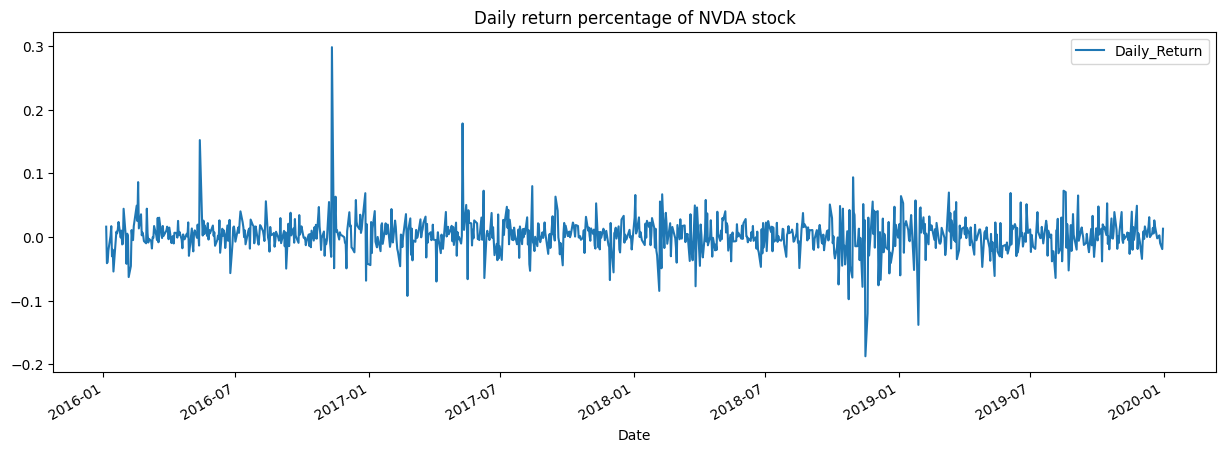

In [87]:
df_nvda['Daily_Return'] = df_nvda['Close'].pct_change()
# plot the daily return percentage
df_nvda['Daily_Return'].plot(legend=True, figsize=(15,5))
plt.title('Daily return percentage of NVDA stock')
plt.show()

* daily return neredeyse normal dağılıma sahip

<Figure size 1200x800 with 0 Axes>

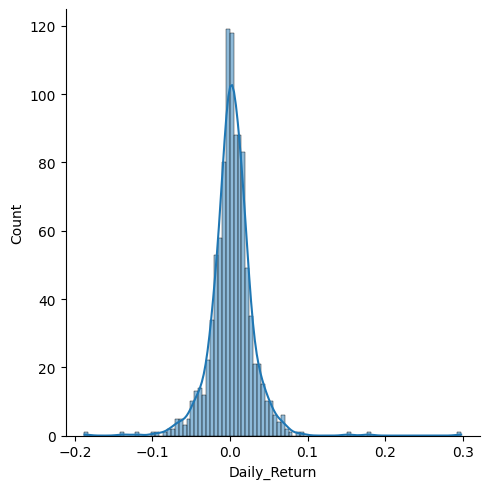

In [88]:
plt.figure(figsize=(12, 8))
sns.displot(df_nvda['Daily_Return'], kde=True)
plt.show()

### Another Basic analysis

* stock önceki gün ile fiyat farkını ekle

In [89]:
df_nvda['Range'] = df_nvda['High'] - df_nvda['Low']
df_nvda['Gap'] = df_nvda['Open'] - df_nvda['Close'].shift(1)

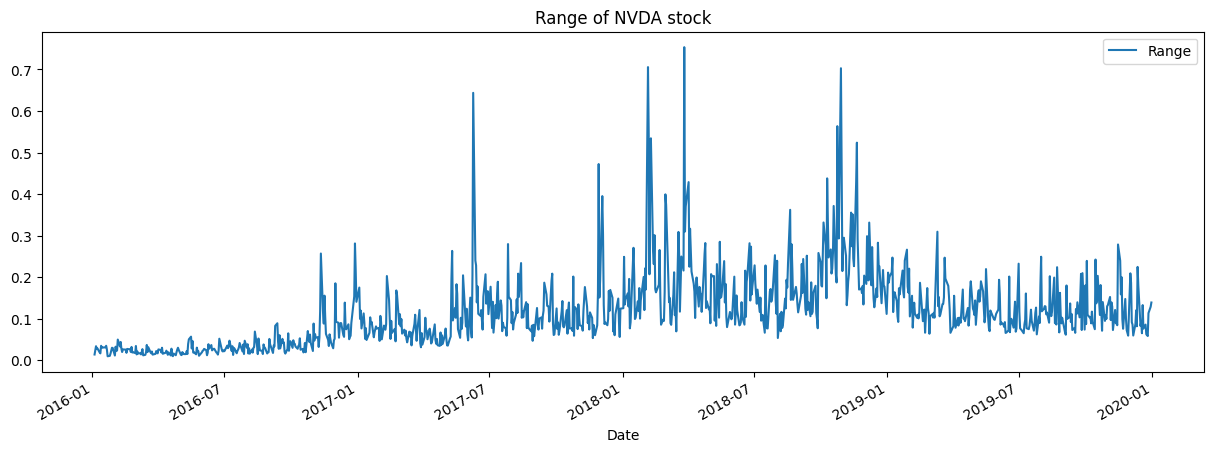

In [90]:
df_nvda['Range'].plot(legend=True, figsize=(15,5))
plt.title('Range of NVDA stock')
plt.show()

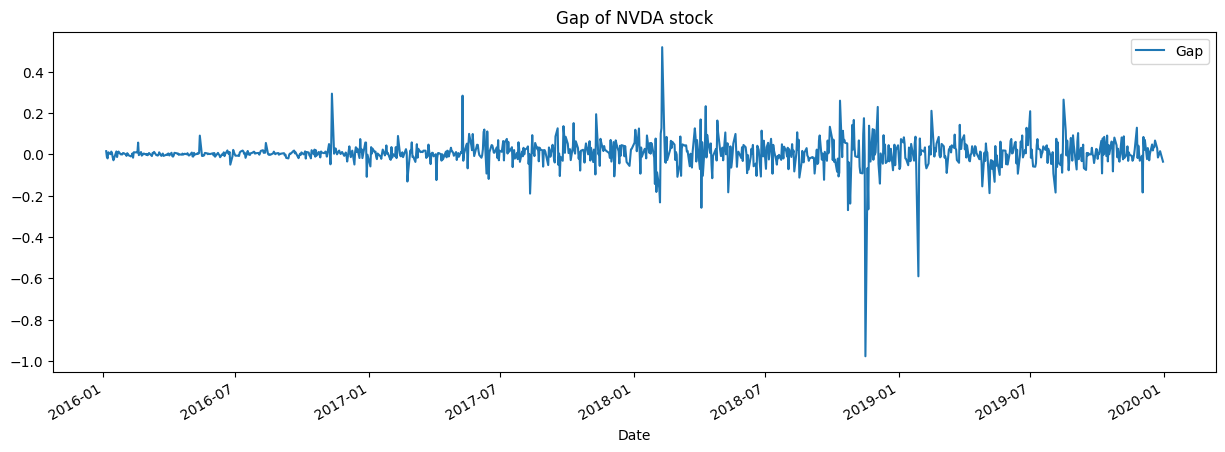

In [91]:
df_nvda['Gap'].plot(legend=True, figsize=(15,5))
plt.title('Gap of NVDA stock')
plt.show()

### Volatility 

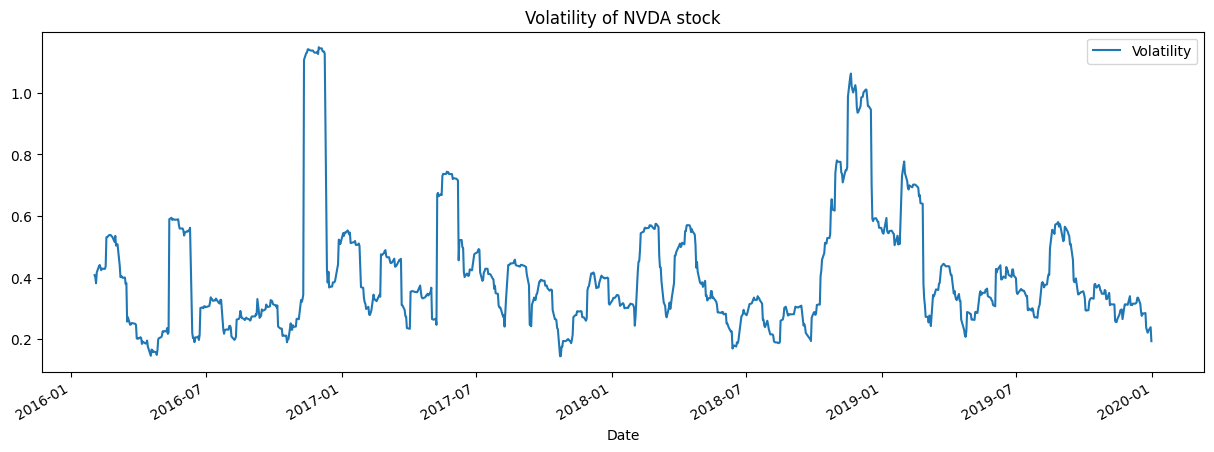

In [92]:
df_nvda['Volatility'] = df_nvda['Daily_Return'].rolling(window=20).std() * np.sqrt(252)

df_nvda['Volatility'].plot(legend=True, figsize=(15,5))
plt.title('Volatility of NVDA stock')
plt.show()

### Volume analysis

* There are few spikes every often.
* will check these dates 

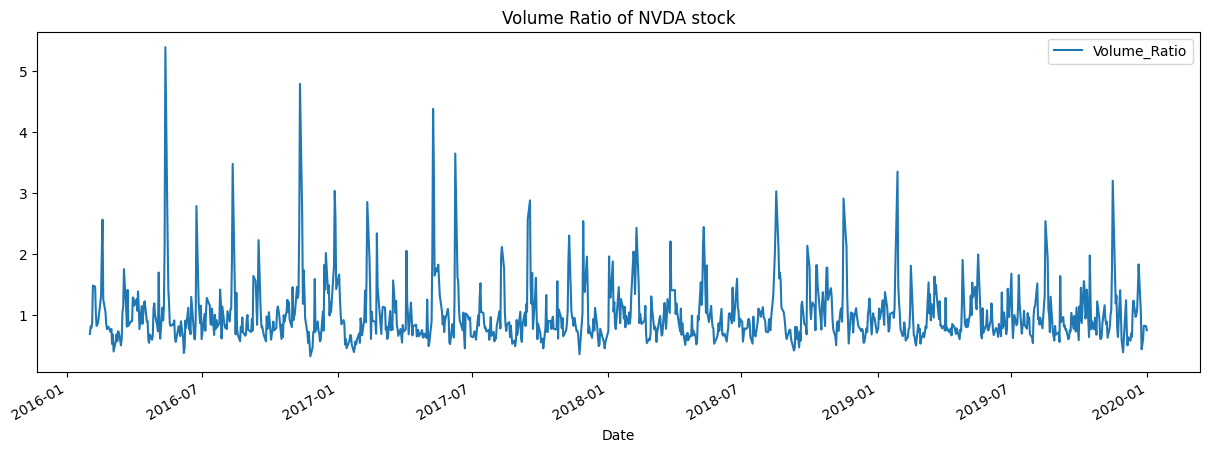

In [93]:
df_nvda['Volume_MA'] = df_nvda['Volume'].rolling(window=20).mean()
df_nvda['Volume_Ratio'] = df_nvda['Volume'] / df_nvda['Volume_MA']

df_nvda['Volume_Ratio'].plot(legend=True, figsize=(15,5))
plt.title('Volume Ratio of NVDA stock')
plt.show()

### Some additional metrics

#### 1.RSI

* Measures the speed and change of price movements
* below 30 RSI may point to the oversold.
* above 70 RSI may point to the overbought.

In [94]:
def calculate_rsi(df, period=14):
    """Calculate Relative Strength Index"""
    delta = df['Adj Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

df_nvda['RSI'] = calculate_rsi(df_nvda)

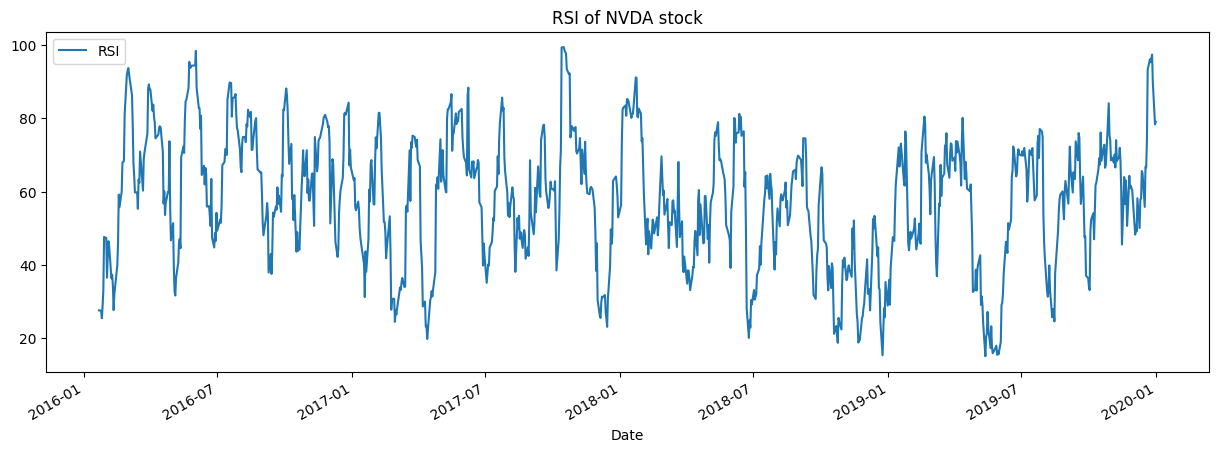

In [95]:
df_nvda['RSI'].plot(legend=True, figsize=(15,5))
plt.title('RSI of NVDA stock')
plt.show()

#### 2.Sharpe Ratio

* Needs rearrange!

In [96]:
def calculate_sharpe_ratio(df, risk_free_rate=0.02):
    """Calculate Sharpe Ratio"""
    excess_returns = df['Daily_Return'] - risk_free_rate/252
    return np.sqrt(252) * excess_returns.mean() / df['Daily_Return'].std()

df_nvda['Sharpe_ratio'] = calculate_sharpe_ratio(df_nvda)

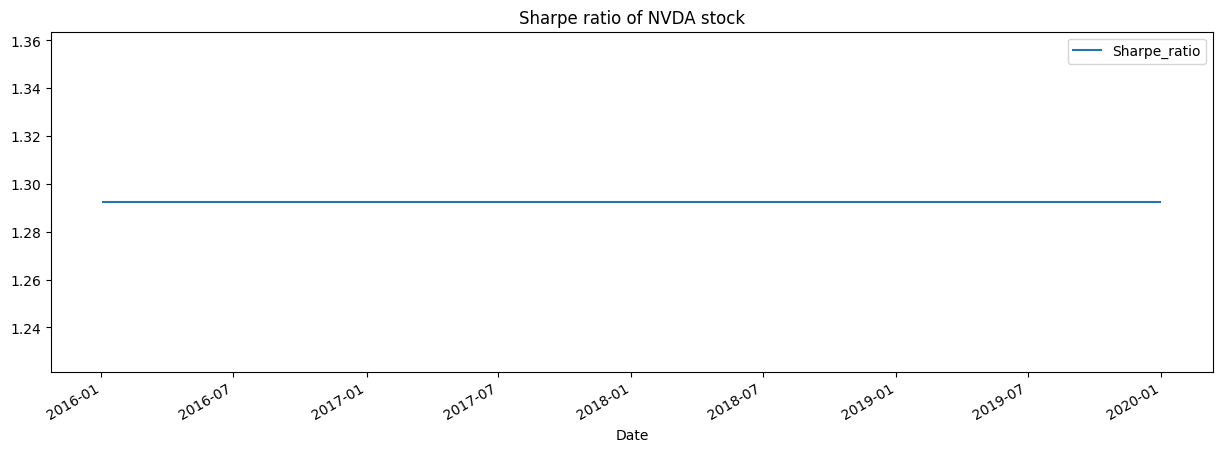

In [97]:
df_nvda['Sharpe_ratio'].plot(legend=True, figsize=(15,5))
plt.title('Sharpe ratio of NVDA stock')
plt.show()

#### 3.Maximum Drawdown